# Pump It Up Challenge
## Tarea Machine Learning - Máster en Data Science, Big Data & Business Intelligence
### Fabio Ovidio Bianchini Cano

# Índice
1. [Introduction](#introduction)
2. [Estudio individual de variables](#EIV)
    - [Amount_tsh](#amount_tsh)
    - [Date_recorded](#date_recorded)
3. [Procesamiento de datos](#preprocess)

<a name="introduction" />

# <span style="color:Crimson">Introducción y Análisis Estadístico</span>

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from custom_functions import describe_numerical, describe_categorical, distribution_checker
# from dirty_cat import SimilarityEncoder
from rapidfuzz import fuzz
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carga y pequeña visualización de los datos
train_data = pd.read_csv("train-values.csv")
train_labels = pd.read_csv("train-labels.csv")
test_data = pd.read_csv("test-values.csv")
display(train_data.head())
display(train_labels.head())
display(test_data.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
# Juntamos el set de entrenamiento con los resultados del mismo
df = pd.merge(train_data, train_labels, on="id")

In [5]:
# Esquema del set
print("Tamaño del set:", df.shape)
df.info()

Tamaño del set: (59400, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          594

In [6]:
# Análisis estadístico variables cuantitativas
describe_numerical(df)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
id,int64,59400,59400,0,0.0,37115.1,0.0,18519.8,37061.5,55656.5,74247.0
amount_tsh,float64,59400,98,0,0.0,317.7,0.0,0.0,0.0,20.0,350000.0
gps_height,int64,59400,2428,0,0.0,668.3,-90.0,0.0,369.0,1319.2,2770.0
longitude,float64,59400,57516,0,0.0,34.1,0.0,33.1,34.9,37.2,40.3
latitude,float64,59400,57517,0,0.0,-5.7,-11.6,-8.5,-5.0,-3.3,-0.0
num_private,int64,59400,65,0,0.0,0.5,0.0,0.0,0.0,0.0,1776.0
region_code,int64,59400,27,0,0.0,15.3,1.0,5.0,12.0,17.0,99.0
district_code,int64,59400,20,0,0.0,5.6,0.0,2.0,3.0,5.0,80.0
population,int64,59400,1049,0,0.0,179.9,0.0,0.0,25.0,215.0,30500.0
construction_year,int64,59400,55,0,0.0,1300.7,0.0,0.0,1986.0,2004.0,2013.0


Podemos sacar las siguientes conclusiones del análisis estadístico de las variables cuantitativas:
- Region_code o district_code se pueden representar como columnas categóricas
- No hay valores nulos per sé, pero está claro que éstos están representados por ceros, puesto que algunos atributos tienen este valor sin tener sentido, como por ejemplo el año de construcción, la longitud (que en Tanzania nunca es 0) o la población.
- Hay algunos atributos con outliers muy grandes (como population o amount_tsh).
- Algunos atributos tienen una gran cantidad de ceros (como amount_tsh o num_private).

In [7]:
# Cambiamos el tipo de algunas variables cuantitativas a categóricas
df[['region_code','district_code', 'num_private']] = df[['region_code','district_code', 'num_private']].astype('object')

# Análisis estadístico variables cualitativas
describe_categorical(df)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
date_recorded,object,59400,356,0,0.0,2011-03-15,572,1.0
funder,object,55763,1896,3637,6.1,Government Of Tanzania,9084,16.3
installer,object,55745,2145,3655,6.2,DWE,17402,31.2
wpt_name,object,59398,37399,2,0.0,none,3563,6.0
num_private,object,59400,65,0,0.0,0,58643,98.7
basin,object,59400,9,0,0.0,Lake Victoria,10248,17.3
subvillage,object,59029,19287,371,0.6,Madukani,508,0.9
region,object,59400,21,0,0.0,Iringa,5294,8.9
region_code,object,59400,27,0,0.0,11,5300,8.9
district_code,object,59400,20,0,0.0,1,12203,20.5


Podemos sacar las siguientes conclusiones del análisis estadístico de las variables categóricas:
- Aquí sí nos encontramos valores nulos.
- Existen variables que tienen una cardinalidad muy alta, como funder, wpt_name, subvillage, scheme name, entre otras.
- Recorded_by no tiene valores diferentes, no aporta información.
- Algunas variables tienen modas muy altas, como num_private o public_meeting.

In [8]:
# Mostramos las variables categóricas con cardinalidad baja
low_cardinal = {col: df[col].nunique() for col in df.select_dtypes(['object']).columns if df[col].nunique() <= 50 }
low_cardinal

{'basin': 9,
 'region': 21,
 'region_code': 27,
 'district_code': 20,
 'public_meeting': 2,
 'recorded_by': 1,
 'scheme_management': 11,
 'permit': 2,
 'extraction_type': 18,
 'extraction_type_group': 13,
 'extraction_type_class': 7,
 'management': 12,
 'management_group': 5,
 'payment': 7,
 'payment_type': 7,
 'water_quality': 8,
 'quality_group': 6,
 'quantity': 5,
 'quantity_group': 5,
 'source': 10,
 'source_type': 7,
 'source_class': 3,
 'waterpoint_type': 7,
 'waterpoint_type_group': 6,
 'status_group': 3}

<a name="EIV" />

# Estudio individual de variables

<a name="amount_tsh" />

## Amount_tsh

In [9]:
display(df["amount_tsh"].describe())
display(df["amount_tsh"].value_counts(normalize=True).head(5))

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

amount_tsh
0.0       0.700993
500.0     0.052222
50.0      0.041616
1000.0    0.025051
20.0      0.024630
Name: proportion, dtype: float64

Podemos comprobar que amount_tsh tiene una gran dispersión de valores y unos outliers muy grandes. Aparte, la mayor cantidad de valores son ceros (>70%). Éstos bien podrían ser valores nulos.


Vamos a comprobar si los ceros aportan algún tipo de información relevante.

In [10]:
temp = df.copy()
temp['amount_tsh_missing'] = np.where( temp['amount_tsh'] == 0.0, 0, 1) # Los ceros los dejamos, el resto los cambiamos a 1

# Distribución comparada con la variable objetivo 
distribution_checker(temp, 'amount_tsh_missing')

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
amount_tsh_missing,,,,,
0,41639.0,70.1,47.3,45.4,7.3
1,17761.0,29.9,70.7,22.2,7.1


Podemos comprobar que los ceros están bastante distribuidos entre las bombas funcionales y no funcionales. Sin embargo, los valores diferentes de 0 de amount_tsh sí que aportan información relevante, puesto que de un 47.3% de bombas funcionales cuando amount_tsh es 0, pasa a un 70.7% cuando amount_tsh es diferente a 0.

<a name="date_recorded" />

## Date_recorded

In [11]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
describe_numerical(df[["date_recorded"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
date_recorded,datetime64[ns],59400,356,0,0.0,2012-03-29 09:11:33.818181888,2002-10-14,2011-04-01,2012-10-10,2013-02-09,2013-12-03


Poca conclusión que sacar de este estudio, podría ser una variable importante.

## Funder

In [12]:
describe_categorical(df[["funder"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
funder,object,55763,1896,3637,6.1,Government Of Tanzania,9084,16.3


Recordamos que funder tiene una cardinalidad muy alta, vamos a buscar los valores más repetidos.

In [13]:
funder = distribution_checker(df, 'funder')
funder = funder.sort_values('Num_bombas', ascending= False)
funder.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
funder,,,,,
Government Of Tanzania,9084.0,16.3,41.0,51.3,7.7
Danida,3114.0,5.6,55.0,39.9,5.1
Hesawa,2202.0,3.9,42.5,47.0,10.5
Rwssp,1374.0,2.5,58.6,33.5,7.9
World Bank,1349.0,2.4,40.4,52.4,7.2
Kkkt,1287.0,2.3,56.2,38.7,5.1
World Vision,1246.0,2.2,59.6,29.9,10.5
Unicef,1057.0,1.9,56.8,33.9,9.4
Tasaf,877.0,1.6,56.2,36.5,7.3


Ninguna conclusión en claro, solo que los nulos tenemos que tratarlos y bajar la cardinalidad todo lo posible teniendo cuidado de no perder información relevante en el proceso.

## Installer

In [14]:
describe_categorical(df[["installer"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
installer,object,55745,2145,3655,6.2,DWE,17402,31.2


In [15]:
# Chequeamos la cardinalidad de los valores más repetidos
installer = distribution_checker(df, 'installer')
installer = installer.sort_values('Num_bombas', ascending= False)
installer.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
installer,,,,,
DWE,17402.0,31.2,54.2,36.5,9.3
Government,1825.0,3.3,29.3,56.7,14.0
RWE,1206.0,2.2,25.2,63.4,11.4
Commu,1060.0,1.9,68.3,28.7,3.0
DANIDA,1050.0,1.9,51.6,40.5,7.9
KKKT,898.0,1.6,47.0,46.1,6.9
Hesawa,840.0,1.5,56.5,41.4,2.0
0,777.0,1.4,57.3,42.3,0.4
TCRS,707.0,1.3,41.0,53.0,5.9


DWE es de lejos el instalador más común. Installer es una variable interesante, procederemos igual que con funder.

## GPS Height

In [16]:
describe_numerical(df[["gps_height"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
gps_height,int64,59400,2428,0,0.0,668.3,-90,0.0,369.0,1319.2,2770


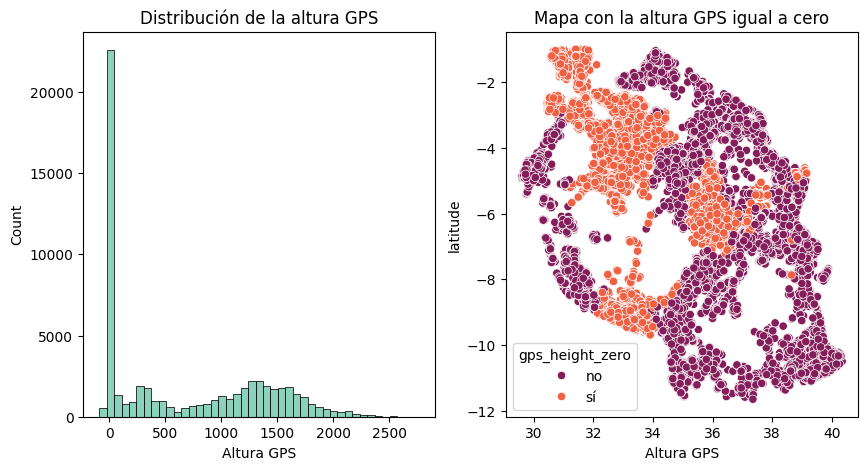

In [17]:
fig, axes = plt.subplots(1, 2,  figsize=(10,5))

# Distribución de la altura de los pozos
sns.histplot(df['gps_height'], color = '#66c2a5', ax=axes[0])
axes[0].set(title = 'Distribución de la altura GPS', xlabel = 'Altura GPS')

# Mapa diferenciando los pozos a nivel de mar de los que no
temp = df[df['longitude'] != 0]  # Ya que hay valores en longitud a 0, no los incluimos en el mapa
temp['gps_height_zero'] = np.where(temp['gps_height'] == 0, 'sí', 'no')
sns.scatterplot(x= temp['longitude'], y = temp['latitude'], hue = temp['gps_height_zero'], palette='rocket', ax = axes[1])
axes[1].set(title = 'Mapa con la altura GPS igual a cero', xlabel = 'Altura GPS')

plt.show()

La altura GPS menor a 0 no tiene sentido.

Además, teniendo en cuenta la geografía de Tanzania, muchos de los pozos colocados a altura 0 están en zonas que no están a altura de mar, con lo cual podemos concluir que los valores nulos son registrados con ceros.

## Longitud y Latitud

In [18]:
describe_numerical(df[["longitude", "latitude"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
longitude,float64,59400,57516,0,0.0,34.1,0.0,33.1,34.9,37.2,40.3
latitude,float64,59400,57517,0,0.0,-5.7,-11.6,-8.5,-5.0,-3.3,-0.0


Como ya hemos comentado, la longitud 0 en Tanzania no existe. Tampoco existe la latitud 0, puesto que el punto más al norte de Tanzania está por debajo del ecuador.

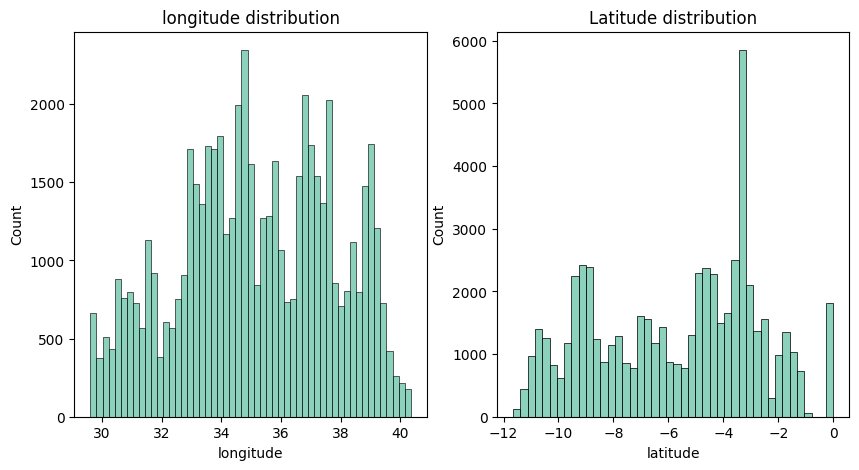

In [19]:
# Distribución de longitud y latitud
fig, axes = plt.subplots(1, 2,  figsize=(10,5))
sns.histplot(temp["longitude"], color = '#66c2a5', ax=axes[0])
axes[0].set(title = 'longitude distribution')


sns.histplot(df['latitude'], color = '#66c2a5', ax=axes[1])
axes[1].set(title = 'Latitude distribution')
plt.show()

Los 0 de la latitud son valores nulos, como ya hemos comentado.

## Wpt Name

In [20]:
describe_categorical(df[["wpt_name"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
wpt_name,object,59398,37399,2,0.0,none,3563,6.0


In [21]:
# Chequeamos la cardinalidad de los valores más repetidos
name = distribution_checker(df, 'wpt_name')
name= name.sort_values('Num_bombas', ascending= False)
name.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
wpt_name,,,,,
none,3563.0,6.0,73.8,24.1,2.1
Shuleni,1748.0,2.9,49.1,42.7,8.2
Zahanati,830.0,1.4,51.8,38.8,9.4
Msikitini,535.0,0.9,49.2,42.6,8.2
Kanisani,323.0,0.5,48.0,45.5,6.5
Bombani,271.0,0.5,58.3,33.9,7.7
Sokoni,260.0,0.4,46.2,43.8,10.0
Ofisini,254.0,0.4,43.3,52.4,4.3
School,208.0,0.4,41.8,51.9,6.2


Waterpoint_name tiene una cardinalidad muy alta. Esto no es sorprendente teniendo en cuenta la naturaleza de la variable. Y por ello también podemos concluir que no tiene relación con el estado de la bomba de agua. Variable que eliminaremos más tarde.

## Num private

In [22]:
describe_categorical(df[["num_private"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
num_private,object,59400,65,0,0.0,0,58643,98.7


Con un 98.7% de valores a 0 podemos concluir que es una variable con poco valor.

## Basin

In [23]:
describe_categorical(df[["basin"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
basin,object,59400,9,0,0.0,Lake Victoria,10248,17.3


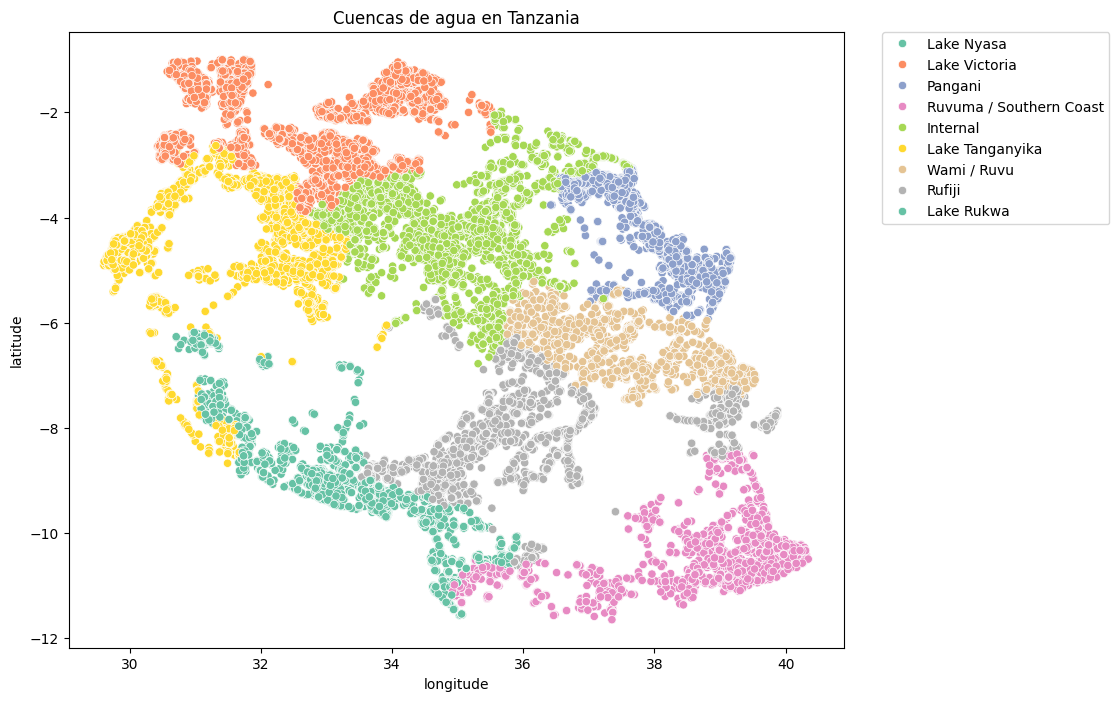

In [24]:
# Mapa de las cuencas de donde viene el agua de cada bomba
fig, axes = plt.subplots(figsize=(10,8))
temp = df[df['longitude'] != 0]
ax = sns.scatterplot(x= temp['longitude'], y = temp['latitude'], hue = temp['basin'], palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(title = 'Cuencas de agua en Tanzania')
plt.show()

In [25]:
basin = distribution_checker(df, 'basin')
basin = basin.sort_values('Num_bombas', ascending= False)
basin.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
basin,,,,,
Lake Victoria,10248.0,17.3,49.8,40.6,9.7
Pangani,8940.0,15.1,60.1,34.6,5.3
Rufiji,7976.0,13.4,63.5,31.0,5.5
Internal,7785.0,13.1,57.6,35.3,7.2
Lake Tanganyika,6432.0,10.8,48.3,40.2,11.5
Wami / Ruvu,5987.0,10.1,52.4,43.1,4.5
Lake Nyasa,5085.0,8.6,65.4,29.7,4.9
Ruvuma / Southern Coast,4493.0,7.6,37.2,55.6,7.3
Lake Rukwa,2454.0,4.1,40.7,48.2,11.0


Distribución bastante igualitaria a lo largo del territorio y ningún porcentaje claramente superior al resto. Probablemente variable a tener en cuenta.

## Region y Region_code

In [26]:
describe_categorical(df[["region", "region_code"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
region,object,59400,21,0,0.0,Iringa,5294,8.9
region_code,object,59400,27,0,0.0,11,5300,8.9


Hay más códigos de región (27) que nombres de región (21), así que tenemos que buscar la manera de agruparlos.

In [27]:
region = distribution_checker(df, 'region')
region = region.sort_values('Num_bombas', ascending= False)
region.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
region,,,,,
Iringa,5294.0,8.9,78.2,19.5,2.3
Shinyanga,4982.0,8.4,56.0,31.3,12.7
Mbeya,4639.0,7.8,50.0,39.1,10.9
Kilimanjaro,4379.0,7.4,60.3,32.4,7.4
Morogoro,4006.0,6.7,52.9,39.6,7.5
Arusha,3350.0,5.6,68.5,26.3,5.2
Kagera,3316.0,5.6,52.1,38.8,9.2
Mwanza,3102.0,5.2,48.4,45.7,5.9
Kigoma,2816.0,4.7,48.4,30.2,21.4


Hay regiones con una diferencia porcentual muy grande con respecto al resto. Ésto es un indicador de que la región es una variable importante.

## District code

In [28]:
describe_categorical(df[["district_code"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
district_code,object,59400,20,0,0.0,1,12203,20.5


In [29]:
#group region_codes by region
district_code = df.groupby(['region', 'district_code',])['id'].count().reset_index()
district_code.head(10)

,region,district_code,id
0,Arusha,1,189
1,Arusha,2,1206
2,Arusha,3,109
3,Arusha,5,201
4,Arusha,6,310
5,Arusha,7,1009
6,Arusha,30,326
7,Dar es Salaam,1,93
8,Dar es Salaam,2,497
9,Dar es Salaam,3,215


Los números de distrito van acorde al número de región, el distrito 1 en Arusha no es el mismo que el distrito 1 en Dar es Salaam. Tendremos que agrupar ambas variables de alguna manera.

## LGA, Ward, Subvillage

In [30]:
describe_categorical(df[["lga", "ward", "subvillage"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
lga,object,59400,125,0,0.0,Njombe,2503,4.2
ward,object,59400,2092,0,0.0,Igosi,307,0.5
subvillage,object,59029,19287,371,0.6,Madukani,508,0.9


In [31]:
villages = df.groupby(['lga', 'ward', 'subvillage'])['id'].count().reset_index()
villages.head(10)

,lga,ward,subvillage,id
0,Arusha Rural,Bangata,Engikaleti,19
1,Arusha Rural,Bangata,Gwasei,1
2,Arusha Rural,Bangata,Kwaniche,5
3,Arusha Rural,Bangata,Lobolosi,1
4,Arusha Rural,Bangata,Ndukenyi,2
5,Arusha Rural,Bangata,Ngwasei,2
6,Arusha Rural,Bangata,Sanganani,2
7,Arusha Rural,Bangata,Sangananu,1
8,Arusha Rural,Bwawani,Buluga,1
9,Arusha Rural,Bwawani,Bwawani,3


In [32]:
lga = distribution_checker(df, 'lga')
lga = lga.sort_values('Num_bombas', ascending= False)
lga.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
lga,,,,,
Njombe,2503.0,4.2,80.2,16.1,3.8
Arusha Rural,1252.0,2.1,69.9,26.3,3.8
Moshi Rural,1251.0,2.1,58.6,31.9,9.5
Bariadi,1177.0,2.0,49.3,16.0,34.7
Rungwe,1106.0,1.9,61.1,24.3,14.6
Kilosa,1094.0,1.8,53.7,39.7,6.7
Kasulu,1047.0,1.8,58.4,22.4,19.2
Mbozi,1034.0,1.7,43.5,49.7,6.8
Meru,1009.0,1.7,65.1,31.7,3.2


Al igual que región y distritos, los lga se dividen en wards y a su vez en subvillages. Imposible utilizar las dos últimas por su altísima cardinalidad. Valoraremos la posibilidad de incluir LGA.

## Population

In [33]:
describe_numerical(df[["population"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
population,int64,59400,1049,0,0.0,179.9,0,0.0,25.0,215.0,30500


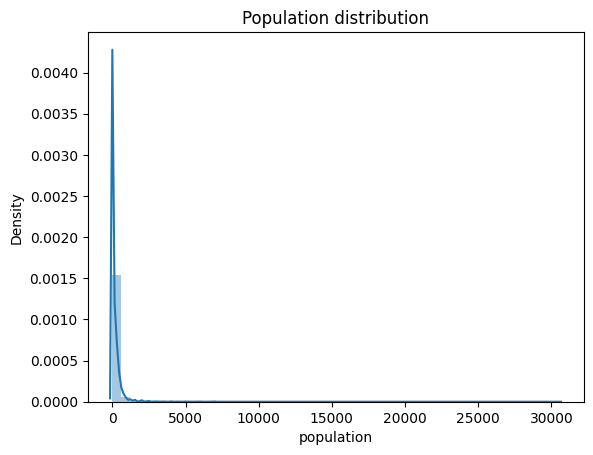

In [34]:
ax = sns.distplot(df['population'])
ax.set(title = 'Population distribution')
plt.show()

Tantas villas con una población a 0 indica que probablemente sean valores nulos. 

## Permit

In [35]:
describe_categorical(df[["permit"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
permit,object,56344,2,3056,5.1,True,38852,69.0


In [36]:
permit = distribution_checker(df, 'permit')
permit.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
permit,,,,,
False,17492.0,31.0,51.7,40.7,7.5
True,38852.0,69.0,55.4,37.6,6.9


Hay muchas más bombas con permiso, pero no hay una diferencia sustancial entre las que son funcionales y las que no. No parece que vaya a ser una variable importante.

## Public Meeting

In [37]:
describe_categorical(df[["public_meeting"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
public_meeting,object,56066,2,3334,5.6,True,51011,91.0


In [38]:
public_meeting = distribution_checker(df, 'public_meeting')
public_meeting.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
public_meeting,,,,,
False,5055.0,9.0,43.0,48.3,8.7
True,51011.0,91.0,55.7,37.0,7.3


Parecido a la variable anterior, pero más exagerado. Aquí sí parece haber un ratio de mayor funcionalidad los que están a True.

## Construction Year

In [39]:
describe_numerical(df[["construction_year"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
construction_year,int64,59400,55,0,0.0,1300.7,0,0.0,1986.0,2004.0,2013


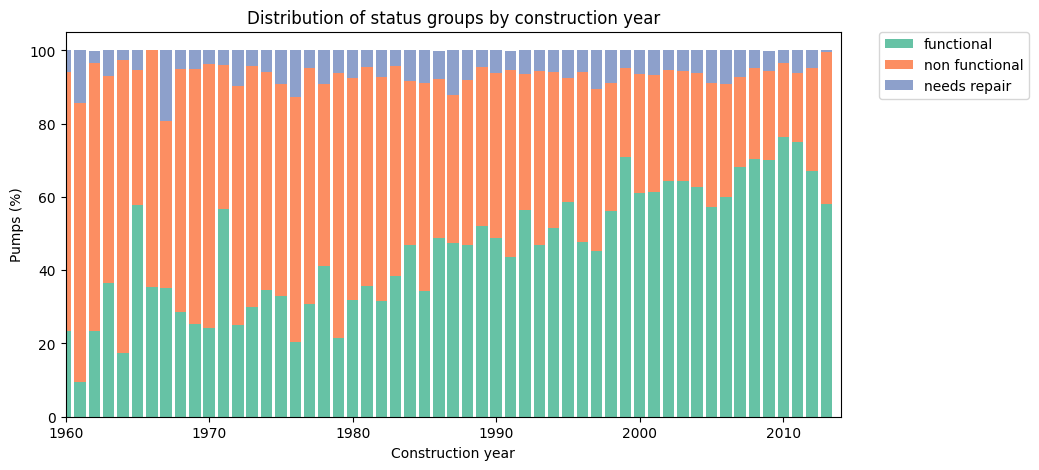

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
construction = distribution_checker(df, 'construction_year')
labels = df['construction_year'].sort_values().unique()
ax.bar(labels, construction['Porcentaje_funcional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, construction['Porcentaje_NO_funcional'], label = 'non functional', bottom = construction['Porcentaje_funcional'] , color = '#fc8e62')
ax.bar(labels, construction['Porcentaje_reparacion'], label = 'needs repair', bottom = construction['Porcentaje_funcional'] + construction['Porcentaje_NO_funcional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by construction year', xlabel = 'Construction year', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([1960,2014])
plt.show()

Hay una clara tendencia a que con el tiempo las bombas son más probables de que sean funcionales. Hay muchos valores a 0, que asumimos como nulos.

## Extraction type class, extraction type group, extraction type

In [41]:
describe_categorical(df[["extraction_type_class", "extraction_type_group", "extraction_type"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
extraction_type_class,object,59400,7,0,0.0,gravity,26780,45.1
extraction_type_group,object,59400,13,0,0.0,gravity,26780,45.1
extraction_type,object,59400,18,0,0.0,gravity,26780,45.1


Al igual que con LGA, Ward y Subvillage, extraction_type_class son los tipos de extracción más generales, luego extraction_type_ground contiene más detalles y a su vez extraction_type contiene los detalles más específicos.

In [42]:
extraction_class = distribution_checker(df, 'extraction_type_class')
extraction_class = extraction_class.sort_values('Num_bombas', ascending= False)
extraction_class

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
extraction_type_class,,,,,
gravity,26780.0,45.1,59.9,30.0,10.1
handpump,16456.0,27.7,63.0,30.9,6.0
other,6430.0,10.8,16.0,80.8,3.2
submersible,6179.0,10.4,53.9,42.0,4.1
motorpump,2987.0,5.0,38.0,57.4,4.6
rope pump,451.0,0.8,65.0,31.3,3.8
wind-powered,117.0,0.2,42.7,51.3,6.0


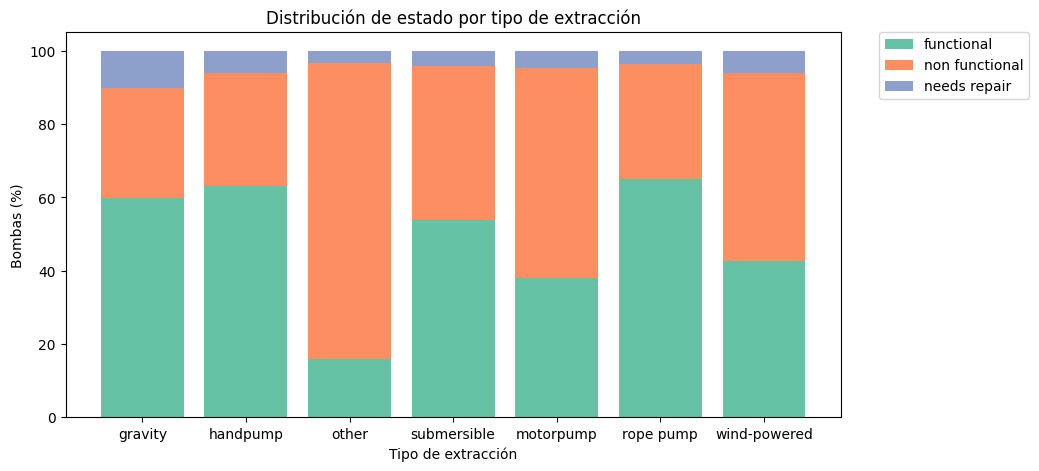

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
labels = labels = extraction_class.index
ax.bar(labels, extraction_class['Porcentaje_funcional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, extraction_class['Porcentaje_NO_funcional'], label = 'non functional', bottom = extraction_class['Porcentaje_funcional'] , color = '#fc8e62')
ax.bar(labels, extraction_class['Porcentaje_reparacion'], label = 'needs repair', bottom = extraction_class['Porcentaje_funcional'] + extraction_class['Porcentaje_NO_funcional'],  color = '#8da0cb')
ax.set(title = 'Distribución de estado por tipo de extracción', xlabel = 'Tipo de extracción', ylabel = 'Bombas (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

La gravedad es método más común con diferencia, pero también tiene un mayor porcentaje de bombas que necesitan reparación. 
Los métodos no registrados (otros) tienen una grandísima probabilidad de no ser funcional.
Algunos de los métodos tienen unos porcentajes muy variados. Parece ser una variable muy importante.


## Management group y Scheme management

In [44]:
describe_categorical(df[["management_group", "scheme_management"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
management_group,object,59400,5,0,0.0,user-group,52490,88.4
scheme_management,object,55522,11,3878,6.5,VWC,36793,66.3


In [45]:
management_group = distribution_checker(df, 'management_group')
management_group = management_group.sort_values('Num_bombas', ascending= False)
management_group.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
management_group,,,,,
user-group,52490.0,88.4,53.8,38.7,7.4
commercial,3638.0,6.1,61.4,35.3,3.2
parastatal,1768.0,3.0,57.7,30.4,11.9
other,943.0,1.6,56.0,38.1,5.9
unknown,561.0,0.9,39.9,55.3,4.8


In [46]:
scheme = distribution_checker(df, 'scheme_management')
scheme = scheme.sort_values('Num_bombas', ascending= False)
scheme.head(11)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
scheme_management,,,,,
VWC,36793.0,66.3,51.5,42.1,6.3
WUG,5206.0,9.4,57.7,29.4,12.9
Water authority,3153.0,5.7,51.3,34.5,14.2
WUA,2883.0,5.2,69.2,22.5,8.3
Water Board,2748.0,4.9,74.7,21.3,4.0
Parastatal,1680.0,3.0,57.5,30.5,12.0
Private operator,1063.0,1.9,68.6,29.3,2.2
Company,1061.0,1.9,50.3,46.2,3.5
Other,766.0,1.4,59.8,37.3,2.9


In [47]:
# Scheme_management por cada management_group
scheme_management = df.groupby(['management_group', 'scheme_management' ])['id'].count().reset_index()
scheme_management.tail(10)

,management_group,scheme_management,id
34,user-group,Other,154
35,user-group,Parastatal,48
36,user-group,Private operator,85
37,user-group,SWC,10
38,user-group,Trust,7
39,user-group,VWC,36361
40,user-group,WUA,2655
41,user-group,WUG,5170
42,user-group,Water Board,2719
43,user-group,Water authority,2055


Hay algunas filas donde no coincide management_group con scheme_management (Parastatal dentro de user_group). Pero de resto son variables que ofrecen una buena cantidad de variabilidad entre todos sus valores, las podemos considerar importantes, sobre todo scheme_management, que ofrece más información. 

Dentro de esta, VWC es la que más porcentaje de bombas tiene, con mucha diferencia, pero el resto ofrece información relevante, a pesar de no tener una gran cantidad de casos.


## Payment

In [48]:
describe_categorical(df[["payment"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
payment,object,59400,7,0,0.0,never pay,25348,42.7


In [49]:
payment = distribution_checker(df, 'payment')
payment = payment.sort_values('Num_bombas', ascending= False)
payment.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
payment,,,,,
never pay,25348.0,42.7,44.9,47.6,7.5
pay per bucket,8985.0,15.1,67.8,27.7,4.6
pay monthly,8300.0,14.0,66.0,22.8,11.2
unknown,8157.0,13.7,43.3,51.5,5.3
pay when scheme fails,3914.0,6.6,62.1,30.9,7.1
pay annually,3642.0,6.1,75.2,18.0,6.8
other,1054.0,1.8,58.0,30.8,11.2


La gran mayoría de bombas son gratis, pero las que se suelen pagar tienen mayor índice de funcionalidad.

## Quality group y water_quality

In [50]:
describe_categorical(df[["quality_group", "water_quality"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
quality_group,object,59400,6,0,0.0,good,50818,85.6
water_quality,object,59400,8,0,0.0,soft,50818,85.6


In [51]:
quality_group = distribution_checker(df, 'quality_group')
quality_group = quality_group.sort_values('Num_bombas', ascending= False)
display(quality_group.head(10))

water_quality = distribution_checker(df, 'water_quality')
water_quality = water_quality.sort_values('Num_bombas', ascending= False)
water_quality.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
quality_group,,,,,
good,50818.0,85.6,56.6,35.7,7.7
salty,5195.0,8.7,46.1,48.2,5.7
unknown,1876.0,3.2,14.1,84.1,1.9
milky,804.0,1.4,54.5,43.8,1.7
colored,490.0,0.8,50.2,38.8,11.0
fluoride,217.0,0.4,72.4,21.7,6.0


,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
water_quality,,,,,
soft,50818.0,85.6,56.6,35.7,7.7
salty,4856.0,8.2,45.7,49.6,4.6
unknown,1876.0,3.2,14.1,84.1,1.9
milky,804.0,1.4,54.5,43.8,1.7
coloured,490.0,0.8,50.2,38.8,11.0
salty abandoned,339.0,0.6,51.3,27.4,21.2
fluoride,200.0,0.3,75.5,18.0,6.5
fluoride abandoned,17.0,0.0,35.3,64.7,0.0


La gran mayoría de bombas tiene una buena calidad de agua. Las aguas con fluoruro, con color, lechosas o saladas son aguas de mala calidad, a pesar de que las que tienen fluoruro tengan un mayor índice de funcionalidad.

Water_quality divide en 2 los valores salty y fluoride, para separarlos en los que están o no abandonados. No creo que marque mucho la diferencia, sobre todo teniendo en cuenta los pocos casos que contiene cada uno.

## Quantity group

In [52]:
describe_categorical(df[["quantity_group"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
quantity_group,object,59400,5,0,0.0,enough,33186,55.9


In [53]:
quantity_group = distribution_checker(df, 'quantity_group')
quantity_group = quantity_group.sort_values('Num_bombas', ascending= False)
quantity_group.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
quantity_group,,,,,
enough,33186.0,55.9,65.2,27.5,7.2
insufficient,15129.0,25.5,52.3,38.1,9.6
dry,6246.0,10.5,2.5,96.9,0.6
seasonal,4050.0,6.8,57.4,32.3,10.3
unknown,789.0,1.3,27.0,71.2,1.8


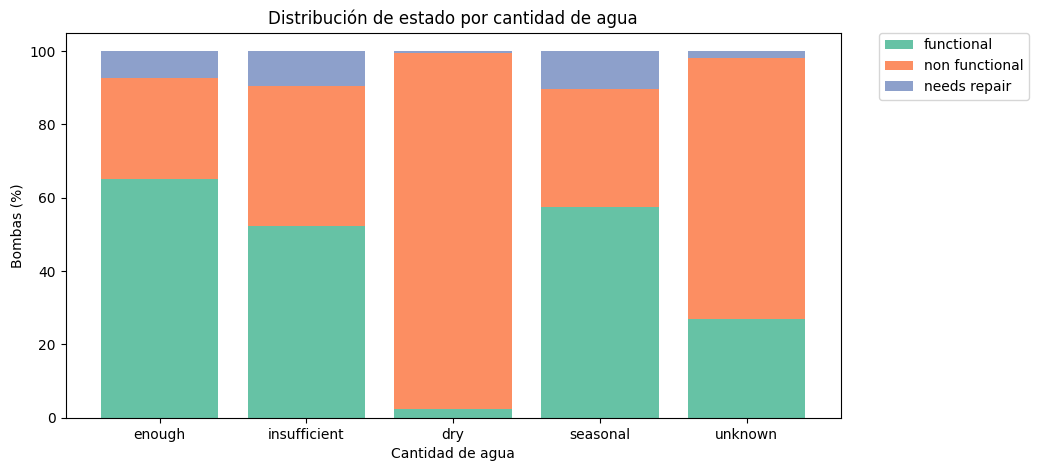

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
labels = labels = quantity_group.index
ax.bar(labels, quantity_group['Porcentaje_funcional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, quantity_group['Porcentaje_NO_funcional'], label = 'non functional', bottom = quantity_group['Porcentaje_funcional'] , color = '#fc8e62')
ax.bar(labels, quantity_group['Porcentaje_reparacion'], label = 'needs repair', bottom = quantity_group['Porcentaje_funcional'] + quantity_group['Porcentaje_NO_funcional'],  color = '#8da0cb')
ax.set(title = 'Distribución de estado por cantidad de agua', xlabel = 'Cantidad de agua', ylabel = 'Bombas (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Información muy relevante encontramos en esta variable: Las que están secas son casi todas disfuncionales, seguidos de los valores nulos. Las que tienen agua insuficiente o se llenan en función de la época del año tienen un buen porcentaje de bombas funcionales, donde la que más es la que tiene agua suficiente durante todo el año. 

Probablemente una variable importante en el modelo.


## Source class, source type, source

In [55]:
describe_categorical(df[["source_class", "source_type", "source"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
source_class,object,59400,3,0,0.0,groundwater,45794,77.1
source_type,object,59400,7,0,0.0,spring,17021,28.7
source,object,59400,10,0,0.0,spring,17021,28.7


In [56]:
source_class = distribution_checker(df, 'source_class')
source_class = source_class.sort_values('Num_bombas', ascending= False)
display(source_class.head(10))

source_type = distribution_checker(df, 'source_type')
source_type = source_type.sort_values('Num_bombas', ascending= False)
display(source_type.head(10))

source = distribution_checker(df, 'source')
source = source.sort_values('Num_bombas', ascending= False)
source.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
source_class,,,,,
groundwater,45794.0,77.1,54.2,39.8,6.0
surface,13328.0,22.4,54.5,33.7,11.8
unknown,278.0,0.5,56.8,41.4,1.8


,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
source_type,,,,,
spring,17021.0,28.7,62.2,30.3,7.5
shallow well,16824.0,28.3,49.5,44.8,5.7
borehole,11949.0,20.1,49.5,46.2,4.3
river/lake,10377.0,17.5,54.2,33.9,11.9
rainwater harvesting,2295.0,3.9,60.4,25.9,13.7
dam,656.0,1.1,38.6,57.8,3.7
other,278.0,0.5,56.8,41.4,1.8


,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
source,,,,,
spring,17021.0,28.7,62.2,30.3,7.5
shallow well,16824.0,28.3,49.5,44.8,5.7
machine dbh,11075.0,18.6,49.0,46.6,4.4
river,9612.0,16.2,56.9,30.4,12.7
rainwater harvesting,2295.0,3.9,60.4,25.9,13.7
hand dtw,874.0,1.5,56.9,41.2,1.9
lake,765.0,1.3,21.2,77.3,1.6
dam,656.0,1.1,38.6,57.8,3.7
other,212.0,0.4,59.4,40.1,0.5


Las tres variables dan información sobre la fuente de donde se saca el agua. Source_class solo contiene 2 valores y no se diferencian mucho entre sí en cuando a porcentualidad. Source_type y source son bastante similares, dividiendo esta última los valores "other" de los "unknown" y los valores river y lake. Teniendo en cuenta la gran diferencia entre las variables que se dividen, probablamente nos quedemos con la más granular.

## Waterpoint type group y waterpoint type

In [57]:
describe_categorical(df[["waterpoint_type_group", "waterpoint_type"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
waterpoint_type_group,object,59400,6,0,0.0,communal standpipe,34625,58.3
waterpoint_type,object,59400,7,0,0.0,communal standpipe,28522,48.0


In [58]:
waterpoint_type_group = distribution_checker(df, 'waterpoint_type_group')
waterpoint_type_group = waterpoint_type_group.sort_values('Num_bombas', ascending= False)
display(waterpoint_type_group.head(10))

waterpoint_type = distribution_checker(df, 'waterpoint_type')
waterpoint_type = waterpoint_type.sort_values('Num_bombas', ascending= False)
waterpoint_type.head(10)

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
waterpoint_type_group,,,,,
communal standpipe,34625.0,58.3,57.6,34.0,8.4
hand pump,17488.0,29.4,61.8,32.3,5.9
other,6380.0,10.7,13.2,82.2,4.6
improved spring,784.0,1.3,71.8,17.3,10.8
cattle trough,116.0,0.2,72.4,25.9,1.7
dam,7.0,0.0,85.7,14.3,0.0


,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
waterpoint_type,,,,,
communal standpipe,28522.0,48.0,62.1,29.9,7.9
hand pump,17488.0,29.4,61.8,32.3,5.9
other,6380.0,10.7,13.2,82.2,4.6
communal standpipe multiple,6103.0,10.3,36.6,52.8,10.6
improved spring,784.0,1.3,71.8,17.3,10.8
cattle trough,116.0,0.2,72.4,25.9,1.7
dam,7.0,0.0,85.7,14.3,0.0


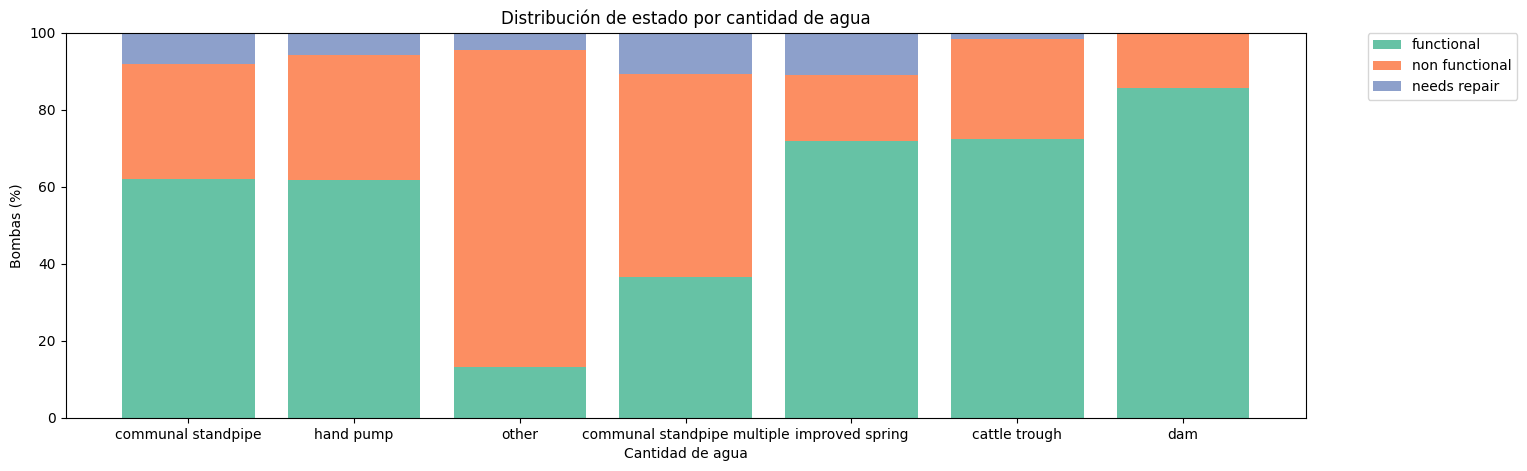

In [59]:
fig, ax = plt.subplots(figsize=(16,5))
labels = waterpoint_type.index
ax.bar(labels, waterpoint_type['Porcentaje_funcional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, waterpoint_type['Porcentaje_NO_funcional'], label = 'non functional', bottom = waterpoint_type['Porcentaje_funcional'] , color = '#fc8e62')
ax.bar(labels, waterpoint_type['Porcentaje_reparacion'], label = 'needs repair', bottom = waterpoint_type['Porcentaje_funcional'] + waterpoint_type['Porcentaje_NO_funcional'],  color = '#8da0cb')
ax.set(title = 'Distribución de estado por cantidad de agua', xlabel = 'Cantidad de agua', ylabel = 'Bombas (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Other tiene significativamente más bombas disfuncionales que el resto, pero le sigue de cerca communal standpipe multiple. Obviaremos los valores con baja presencia y utilizaremos la variable porque considero que probablemente sea importante.

<a name="preprocess" />

# <span style="color:orange">Procesamiento de datos</span>

Empezamos el procesamiento de datos juntando el dataset train y test incluyendo los labels.
Como la mayoría de valores perdidos son representados con 0, los vamos a sustituir.

In [60]:
train = pd.read_csv("train-values.csv", parse_dates = ["date_recorded"], na_values = [0, '0'])
labels = pd.read_csv("train-labels.csv")
test = pd.read_csv("test-values.csv", parse_dates = ["date_recorded"], na_values = [0, '0'])
train= pd.merge(labels , train, on='id')
data = pd.concat([train, test])
data.shape

(74249, 41)

## Valores perdidos

In [61]:
missing = round((data.isna().sum()) / len(data) * 100, 1)
missing = missing.sort_values(ascending = False)
missing.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          48.6
population           36.1
construction_year    35.0
gps_height           34.5
status_group         20.0
installer             7.4
funder                7.4
scheme_management     6.5
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
latitude              0.0
dtype: float64

Obviando los valores NaN de status_group, hay 13 variables con valores nulos. No se imputarán valores en los que tengan más de la mitad de valores nulos.

### Longitud (3.1%)

Utilizaremos las variables region, lga, ward y subvillage para rellenar los valores perdidos de la longitud.

In [62]:
region = data.groupby(['region', 'lga', 'ward', 'subvillage'])['id'].sum().reset_index()
region.head(10)

,region,lga,ward,subvillage,id
0,Arusha,Arusha Rural,Bangata,Engikaleti,843711
1,Arusha,Arusha Rural,Bangata,Gwasei,69607
2,Arusha,Arusha Rural,Bangata,Kwaniche,142313
3,Arusha,Arusha Rural,Bangata,Lobolosi,51080
4,Arusha,Arusha Rural,Bangata,Melenyi,63946
5,Arusha,Arusha Rural,Bangata,Ndukenyi,73715
6,Arusha,Arusha Rural,Bangata,Ngwasei,109834
7,Arusha,Arusha Rural,Bangata,Sanganani,201984
8,Arusha,Arusha Rural,Bangata,Sangananu,20484
9,Arusha,Arusha Rural,Bwawani,Buluga,34309


Como ya hemos visto, esa es la jerarquía de las variables geográficas. 

Vamos a imputar por la media de la longitud en la que se presente la bomba.
Si conocemos la subvillage lo haremos por ésta, si no, lo haremos por el ward, y si no, la siguiente y así sucesivamente.

In [63]:
# Media de longitud en subvillage
means_longitude_subvillage = data.groupby(['region', 'lga', 'ward', 'subvillage'])['longitude'].mean().reset_index()
means_longitude_subvillage = means_longitude_subvillage.rename(columns={"longitude": "longitude_imputed_subvillage"})
display(means_longitude_subvillage.head())

# Ward
means_longitude_ward = data.groupby(['region', 'lga', 'ward',])['longitude'].mean().reset_index()
means_longitude_ward = means_longitude_ward.rename(columns={"longitude": "longitude_imputed_ward"})
display(means_longitude_ward.head())

# LGA
means_longitude_lga = data.groupby(['region', 'lga'])['longitude'].mean().reset_index()
means_longitude_lga = means_longitude_lga .rename(columns={"longitude": "longitude_imputed_lga"})
display(means_longitude_lga.head())

# Region
means_longitude_region = data.groupby(['region'])['longitude'].mean().reset_index()
means_longitude_region = means_longitude_region.rename(columns={"longitude": "longitude_imputed_region"})
means_longitude_region.head()

,region,lga,ward,subvillage,longitude_imputed_subvillage
0,Arusha,Arusha Rural,Bangata,Engikaleti,36.740347
1,Arusha,Arusha Rural,Bangata,Gwasei,36.750458
2,Arusha,Arusha Rural,Bangata,Kwaniche,36.749773
3,Arusha,Arusha Rural,Bangata,Lobolosi,36.742997
4,Arusha,Arusha Rural,Bangata,Melenyi,36.746082


,region,lga,ward,longitude_imputed_ward
0,Arusha,Arusha Rural,Bangata,36.743789
1,Arusha,Arusha Rural,Bwawani,36.813002
2,Arusha,Arusha Rural,Ilkiding'a,36.686382
3,Arusha,Arusha Rural,Kimnyaki,36.650511
4,Arusha,Arusha Rural,Kiranyi,36.660728


,region,lga,longitude_imputed_lga
0,Arusha,Arusha Rural,36.700645
1,Arusha,Arusha Urban,36.686083
2,Arusha,Karatu,35.661994
3,Arusha,Longido,36.698130
4,Arusha,Meru,36.882775


,region,longitude_imputed_region
0,Arusha,36.554067
1,Dar es Salaam,39.212935
2,Dodoma,36.041964
3,Iringa,34.895921
4,Kagera,31.233092


In [64]:
# Mergeamos las columnas que hemos creado al dataframe original
data = data.merge(means_longitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
data = data.merge(means_longitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
data = data.merge(means_longitude_lga, how = 'left', on = ['region', 'lga'])
data = data.merge(means_longitude_region, how = 'left', on = ['region'])

#select the right longitude level based on the availability of information
data['imputed_longitude'] = np.where(data['longitude'].isna(), data['longitude_imputed_subvillage'], data['longitude']) #if longitude is missing, impute it by the mean of the subvillage
data['imputed_longitude'] = np.where(data['imputed_longitude'].isna(), data['longitude_imputed_ward'], data['imputed_longitude']) #if subvillage mean is missing, impute it by the ward
data['imputed_longitude'] = np.where(data['imputed_longitude'].isna(), data['longitude_imputed_lga'], data['imputed_longitude'])
data['imputed_longitude'] = np.where(data['imputed_longitude'].isna(), data['longitude_imputed_region'], data['imputed_longitude'])

#drop redundant columns
data= data.drop(['longitude_imputed_subvillage','longitude_imputed_ward' , 'longitude_imputed_lga' , 'longitude_imputed_region', 'longitude'], axis=1)
round((data["imputed_longitude"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Public meeting (5.6%)

Public meeting tiene un 91% de valores verdaderos, imputaremos por la moda.

In [65]:
data['public_meeting'] = data['public_meeting'].fillna(data['public_meeting'].mode()[0])
round((data["public_meeting"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Permit (5.1%)

Predijimos en el estudio de variables que permit probablemente no fuese una variable importante dado a que no cambia mucho la funcionalidad de la bomba si se tiene permiso o no. 

Imputaremos en función de la moda de nuevo.

In [66]:
data['permit'] = data['permit'].fillna(data['permit'].mode()[0])
round((data["permit"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Scheme management (6.5%)

Teniendo en cuenta que management_group, management y scheme_management están muy relacionados podemos utilizar la otra variable para imputar por la moda.

In [67]:
check = data.groupby(['management_group', 'management', 'scheme_management'])['id'].count().reset_index()
check = check.sort_values(["management", "id"], ascending = [True, False])
check.head(10)

,management_group,management,scheme_management,id
0,commercial,company,Company,848
5,commercial,company,WUG,4
1,commercial,company,Private operator,2
3,commercial,company,VWC,2
2,commercial,company,Trust,1
4,commercial,company,WUA,1
31,other,other,Other,690
33,other,other,VWC,57
37,other,other,Water authority,54
36,other,other,Water Board,26


In [68]:
scheme_mode = data.groupby(['management'])['scheme_management'].agg(pd.Series.mode).reset_index()
scheme_mode = scheme_mode.rename(columns = {"scheme_management": "imputed_scheme__management"})
scheme_mode 

,management,imputed_scheme__management
0,company,Company
1,other,Other
2,other - school,SWC
3,parastatal,Parastatal
4,private operator,Private operator
5,trust,Trust
6,unknown,VWC
7,vwc,VWC
8,water authority,Water authority
9,water board,Water Board


In [69]:
# Juntamos el nuevo dataframe con el nuestro y procuramos rellenar los NaN con los valores obtenidos
data = data.merge(scheme_mode, how = 'left', on = ['management'])
data['imputed_scheme_management'] = np.where(data['scheme_management'].isna(), data['imputed_scheme__management'], data['scheme_management'])

# Eliminamos las columnas sobrantes
data = data.drop(['scheme_management', 'imputed_scheme__management'],axis=1)
round((data["imputed_scheme_management"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Installer (7.4%)

Installer es una variable categórica con más de 2000 valores únicos. Vamos primero a procesarlos para tratarlos correctamente.


In [70]:
data['installer'] = data['installer'].str.lower()

installer = data.groupby('installer')['id'].count().reset_index()
installer = installer.sort_values('id', ascending = False)
installer.head(10)

,installer,id
433,dwe,21756
570,government,2367
650,hesawa,1768
1620,rwe,1498
295,commu,1354
353,danida,1306
406,district council,1181
879,kkkt,1135
230,central government,933
1847,tcrs,887


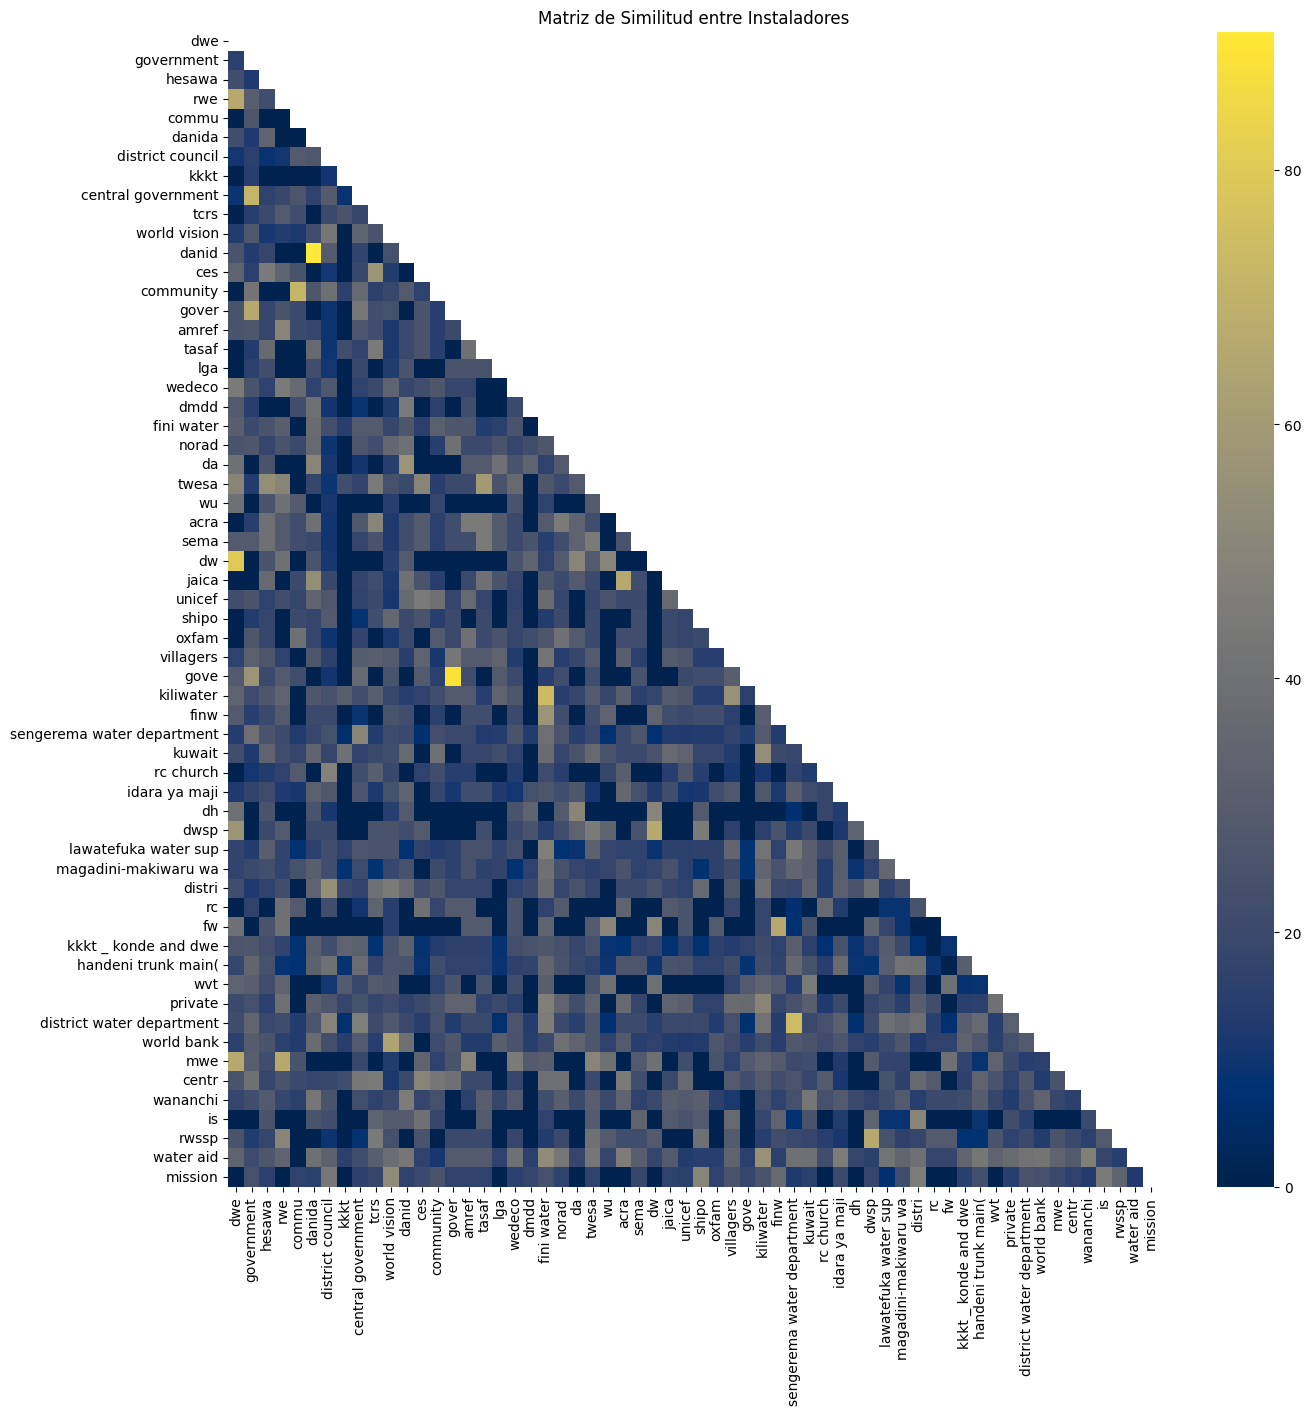

In [102]:
# Matriz de correlación de los instaladores más comunes
top_installers = installer.nlargest(60, 'id')['installer'].unique()
n = top_installers.size
similarity_matrix = np.zeros((n, n))

for i in range(n):
    similarity_matrix[i, :i + 1] = [fuzz.ratio(top_installers[i], top_installers[j]) for j in range(i + 1)]

mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))

plt.figure(figsize=(15, 15))
sns.heatmap(similarity_matrix, mask=mask, xticklabels=top_installers, yticklabels=top_installers, cmap='cividis', annot=False)
plt.title('Matriz de Similitud entre Instaladores')
plt.show()

Vamos a juntar algunas variables que parecen demasiado similares tanto en valores de la variable como en el propio nombre de la variable.
Puede que se traten de erratas.


In [103]:
data['installer'] = np.where( data['installer']=='gove', 'gover', data['installer'] )
data['installer'] = np.where( data['installer']=='community', 'commu', data['installer'] )
data['installer'] = np.where( data['installer']=='danid', 'danida', data['installer'] )

installer = data.groupby('installer')['id'].count().reset_index()
installer = installer.sort_values('id', ascending = False)
installer.head(10)

,installer,id
431,dwe,21756
567,government,2367
351,danida,2092
295,commu,2044
647,hesawa,1768
1617,rwe,1498
404,district council,1181
876,kkkt,1135
230,central government,933
562,gover,929


No hay forma fácil de lidiar con la alta cardinalidad a partir de este momento, tendremos que hacer una criba. 

Después de un poco de juego con los valores, he llegado a la conclusión de que vale la pena quedarse con aproximadamente el top 100 de los instaladores. 

In [109]:
top_installers = installer.nlargest(100, 'id')['installer'].unique()

# Los que no estén en el top 100 los cambiamos por "other"
data['installer'] = np.where(data['installer'].isin(top_installers), data['installer'], 'other')

In [133]:
round((data["installer"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Funder (7.4%)

In [111]:
# Ponemos todos los valores en minúscula, igual que con los installers
data['funder'] = data['funder'].str.lower()

funder = data.groupby('funder')['id'].count().reset_index()
funder = funder.sort_values('id', ascending = False)
funder.head(10)

,funder,id
506,government of tanzania,11299
292,danida,3907
572,hesawa,2782
1597,rwssp,1703
2104,world bank,1701
807,kkkt,1623
2106,world vision,1562
1959,unicef,1324
1839,tasaf,1135
326,dhv,1065


De nuevo, con la cardinalidad astronómica que tiene funder, haremos una criba del top 100, que sigue siendo aproximadamente el valor ideal.

In [112]:
top_funders = funder.nlargest(100, 'id')['funder'].unique()

# Los que no estén en el top 100 los cambiamos por "other"
data['funder'] = np.where(data['funder'].isin(top_funders), data['funder'], 'other')

### Construction Year (35%)

Imputaremos construction_year por la media de sus valores.

In [129]:
#We can see that the mean construction year by extraction type group gives much more detailed information
mean_construction = data['construction_year'].mean()
mean_construction 

np.float64(1996.8709430210642)

In [134]:
data['construction_year'] = data['construction_year'].fillna(mean_construction)
round((data["construction_year"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### GPS Height (34.5%)

Como ya hemos comentado, los valores a 0 o por debajo de 0 no tienen sentido puesto que Tanzania no está por debajo del nivel del mar.

Imputaremos los valores nulos por la media de las regiones, utilizando la misma técnica que con la longitud, utilizando las variables region, lga, ward y subvillage respectivamente. Aunque ahora incluiremos basin, ya que considero que puede tener algo que ver con la altura de las bombas.

In [135]:
# Media por subvillage
means_altitude_subvillage = data.groupby(['region', 'lga', 'ward', 'subvillage'])['gps_height'].mean().reset_index()
means_altitude_subvillage = means_altitude_subvillage.rename(columns={"gps_height": "gps_height_imputed_subvillage"})

# Media por ward
means_altitude_ward = data.groupby(['region', 'lga', 'ward',])['gps_height'].mean().reset_index()
means_altitude_ward = means_altitude_ward.rename(columns={"gps_height": "gps_height_imputed_ward"})

# Media por lga
means_altitude_lga = data.groupby(['region', 'lga'])['gps_height'].mean().reset_index()
means_altitude_lga = means_altitude_lga .rename(columns={"gps_height": "gps_height_imputed_lga"})

# Media por region
means_altitude_region = data.groupby(['region'])['gps_height'].mean().reset_index()
means_altitude_region = means_altitude_region.rename(columns={"gps_height": "gps_height_imputed_region"})

# Media por basin
means_altitude_basin = data.groupby(['basin'])['gps_height'].mean().reset_index()
means_altitude_basin = means_altitude_basin.rename(columns={"gps_height": "gps_height_imputed_basin"})

# Añadimos todas las columnas nuevas al dataframe 
data = data.merge(means_altitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
data = data.merge(means_altitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
data = data.merge(means_altitude_lga, how = 'left', on = ['region', 'lga'])
data = data.merge(means_altitude_region, how = 'left', on = ['region'])
data = data.merge(means_altitude_basin, how = 'left', on = ['basin'])

# Juntamos todas las columnas nuevas en una sola
data['imputed_gps_height'] = np.where(data['gps_height'].isna(), data['gps_height_imputed_subvillage'], data['gps_height']) #if longitude is missing, impute it by the mean of the subvillage
data['imputed_gps_height'] = np.where(data['imputed_gps_height'].isna(), data['gps_height_imputed_ward'], data['imputed_gps_height']) #if subvillage mean is missing, impute it by the ward
data['imputed_gps_height'] = np.where(data['imputed_gps_height'].isna(), data['gps_height_imputed_lga'], data['imputed_gps_height'])
data['imputed_gps_height'] = np.where(data['imputed_gps_height'].isna(), data['gps_height_imputed_region'], data['imputed_gps_height'])
data['imputed_gps_height'] = np.where(data['imputed_gps_height'].isna(), data['gps_height_imputed_basin'], data['imputed_gps_height'])

# Eliminamos las columnas temporales que hemos utilizado
data = data.drop(['gps_height_imputed_subvillage','gps_height_imputed_ward' , 'gps_height_imputed_lga' , 'gps_height_imputed_region', 'gps_height', 'gps_height_imputed_basin'], axis=1)

In [137]:
round((data["imputed_gps_height"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Population (36.1%)

Utilizaremos exactamente la misma estrategia que para la altura GPS, puesto que considero que es una técnica que funciona bien en ambos casos.

In [139]:
# Media por subvillage
means_population_subvillage = data.groupby(['region', 'lga', 'ward', 'subvillage'])['population'].mean().reset_index()
means_population_subvillage = means_population_subvillage.rename(columns={"population": "population_imputed_subvillage"})

# Media por ward
means_population_ward = data.groupby(['region', 'lga', 'ward',])['population'].mean().reset_index()
means_population_ward = means_population_ward.rename(columns={"population": "population_imputed_ward"})

# Media por lga
means_population_lga = data.groupby(['region', 'lga'])['population'].mean().reset_index()
means_population_lga = means_population_lga.rename(columns={"population": "population_imputed_lga"})

# Media por region
means_population_region = data.groupby(['region'])['population'].mean().reset_index()
means_population_region = means_population_region.rename(columns={"population": "population_imputed_region"})

# Media por basin
means_population_basin = data.groupby(['basin'])['population'].mean().reset_index()
means_population_basin = means_population_basin.rename(columns={"population": "population_imputed_basin"})

# Añadimos todas las columnas nuevas al dataframe 
data = data.merge(means_population_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
data = data.merge(means_population_ward, how = 'left', on = ['region', 'lga', 'ward'])
data = data.merge(means_population_lga, how = 'left', on = ['region', 'lga'])
data = data.merge(means_population_region, how = 'left', on = ['region'])
data = data.merge(means_population_basin, how = 'left', on = ['basin'])

# Juntamos todas las columnas nuevas en una sola
data['imputed_population'] = np.where(data['population'].isna(), data['population_imputed_subvillage'], data['population'])
data['imputed_population'] = np.where(data['imputed_population'].isna(), data['population_imputed_ward'], data['imputed_population'])
data['imputed_population'] = np.where(data['imputed_population'].isna(), data['population_imputed_lga'], data['imputed_population'])
data['imputed_population'] = np.where(data['imputed_population'].isna(), data['population_imputed_region'], data['imputed_population'])
data['imputed_population'] = np.where(data['imputed_population'].isna(), data['population_imputed_basin'], data['imputed_population'])

# Eliminamos las columnas temporales que hemos utilizado
data = data.drop(['population_imputed_subvillage','population_imputed_ward' , 'population_imputed_lga' , 'population_imputed_region', 'population', 'population_imputed_basin'], axis=1)

In [140]:
round((data["imputed_population"].isna().sum()) / len(data) * 100, 1)

np.float64(0.0)

### Columnas insalvables 

Hay columnas dentro del dataset que, lamentablemente, tienen tantos valores nulos que no podemos imputarlas de ninguna manera lógica sin arruinar la información que nos podrían aportar. Vamos a eliminarlas por completo de nuestro dataset.

In [145]:
data = data.drop(columns=["num_private", "scheme_name"])

## Tipos de datos

A lo largo del proceso de imputación hay muchas columnas que han cambiado erróneamente de tipo. Corrijamos eso.

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74249 entries, 0 to 74248
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         74249 non-null  int64         
 1   status_group               59399 non-null  object        
 2   amount_tsh                 22201 non-null  float64       
 3   date_recorded              74249 non-null  datetime64[ns]
 4   funder                     74249 non-null  object        
 5   installer                  74249 non-null  object        
 6   latitude                   74249 non-null  float64       
 7   wpt_name                   74247 non-null  object        
 8   basin                      74249 non-null  object        
 9   subvillage                 73779 non-null  object        
 10  region                     74249 non-null  object        
 11  region_code                74249 non-null  int64         
 12  dist

In [174]:
# Booleano -> Entero
data['public_meeting'] = data['public_meeting'].replace({True: 1, False: 0})
data['permit'] = data['permit'].replace({True: 1, False: 0})


# Flotante -> Entero
data[['imputed_gps_height', 'construction_year', 'imputed_population']] = data[['imputed_gps_height', 'construction_year', 'imputed_population']].astype('int')

# * -> Categórica
data[['region_code', 'district_code']] = data[['region_code', 'district_code']].astype('str')

# Quitar decimal
data['district_code'] = data['district_code'].str.split(".").str[0]

Renombramos las columnas a las que habíamos cambiado el nombre temporalmente a su valor original.

In [177]:
data = data.rename(columns={"imputed_scheme_management": "scheme_management", "imputed_gps_height": "gps_height", 
                   'imputed_population': 'population', 'imputed_longitude': 'longitude'}, errors="raise")

<a name="preprocess" />

# <span style="color:HotPink">Ingeniería de atributos</span>

Por fin avanzamos de etapa, dejando atrás el preprocesamiento de datos. Ahora crearemos variables nuevas y modificaremos las antiguas para aportar más información o la misma de manera más estructurada.

In [178]:
final_df = data.copy()

### Edad de la bomba

Vale la pena guardar en una variable cuántos años lleva construida la bomba.

In [179]:
final_df['recorded_year'] = pd.DatetimeIndex(final_df ['date_recorded']).year
final_df['age'] = final_df['recorded_year'] - final_df['construction_year']
final_df = final_df.drop('recorded_year',axis=1)

### Amount tsh missing

Como ya hemos hablado en el estudio estadístico, las bombas que contienen valores en amount_tsh tienen una mayor probabilidad de ser funcionales, con respecto a las que no. Vamos a guardar la variable en vez de como valor flotante, como valor booleano.

In [180]:
final_df['amount_tsh_missing'] = np.where(final_df['amount_tsh'].isna(), 1, 0)
distribution_checker(final_df, 'amount_tsh_missing')

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
amount_tsh_missing,,,,,
0,17761.0,29.9,70.7,22.2,7.1
1,41638.0,70.1,47.3,45.4,7.3


### Region District

Juntaremos las variables region y district_code. Es importante puesto que la segunda depende de la primera.

In [181]:
final_df['region_district'] = final_df['region']+ "-" + final_df['district_code']
region_district = distribution_checker(final_df,  'region_district')
region_district.head()

,Num_bombas,Porcentaje_total_bombas,Porcentaje_funcional,Porcentaje_NO_funcional,Porcentaje_reparacion
region_district,,,,,
Arusha-1,189.0,0.3,50.3,33.9,15.9
Arusha-2,1206.0,2.0,69.6,26.6,3.8
Arusha-3,109.0,0.2,71.6,20.2,8.3
Arusha-30,326.0,0.5,96.9,2.8,0.3
Arusha-5,201.0,0.3,54.2,31.8,13.9


### Longitud y latitud

Simplificamos las variables longitud y latitud, al fin y al cabo no se necesita especificar tanto en la posición de la bomba en el mapa. Dos decimales será suficiente.

In [182]:
final_df['longitude'] = round(final_df['longitude'], 2)
final_df['latitude'] = round(final_df['latitude'],2)

### Variables de extracción

Tenemos que juntar las variables de extracción, analicémoslas de nuevo para ver cómo hacerlo

In [184]:
describe_categorical(df[["extraction_type_class", "extraction_type_group", "extraction_type"]])

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
extraction_type_class,object,59400,7,0,0.0,gravity,26780,45.1
extraction_type_group,object,59400,13,0,0.0,gravity,26780,45.1
extraction_type,object,59400,18,0,0.0,gravity,26780,45.1


In [187]:
final_df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type'])['id'].count().reset_index()

,extraction_type_class,extraction_type_group,extraction_type,id
0,gravity,gravity,gravity,33263
1,handpump,afridev,afridev,2207
2,handpump,india mark ii,india mark ii,3029
3,handpump,india mark iii,india mark iii,135
4,handpump,nira/tanira,nira/tanira,10205
5,handpump,other handpump,other handpump,103
6,handpump,other handpump,swn,284
7,handpump,other handpump,walimi,60
8,handpump,swn 80,swn 80,4588
9,motorpump,mono,mono,3628


Algunos valores de extraction_type no aportan tanta información nueva como para tenerlos como valores individuales. Esos valores de deberán juntarse entre sí.

In [186]:
# swn 80 y swn 81 se transforman en swn
# cemo + climax se transforman en other motorpump
# other-mkulima, other-play and walimi se transforman en other handpump

swn = ['other - swn 81', 'swn80']
final_df['extraction_type'] = np.where(final_df['extraction_type'].isin(swn), 'swn', final_df['extraction_type'])

other_handpump = ['other - mkulima/shinyanga', 'other - play pump', 'other - walimi']
final_df['extraction_type'] = np.where(final_df['extraction_type'].isin(other_handpump), 'other handpump',  final_df['extraction_type'])

other_motorpump = ['cemo', 'climax']
final_df['extraction_type'] = np.where(final_df['extraction_type'].isin(other_motorpump), 'other motorpump',  final_df['extraction_type'])

### Valores de fuente de origen (sources)

In [191]:
final_df.groupby(['source_class', 'source_type','source' ])['id'].count().reset_index()

,source_class,source_type,source,id
0,groundwater,borehole,hand dtw,1108
1,groundwater,borehole,machine dbh,13822
2,groundwater,shallow well,shallow well,21139
3,groundwater,spring,spring,21216
4,surface,dam,dam,840
5,surface,rainwater harvesting,rainwater harvesting,2863
6,surface,river/lake,lake,950
7,surface,river/lake,river,11964
8,unknown,other,other,261
9,unknown,other,unknown,86


Los valores raros los juntaremos entre sí (unknown y other separados no aportan nada de información).

In [192]:
other = ['other',  'unknown']
final_df['source'] = np.where(final_df['source']=='unknown', 'other', final_df['source'])

## Eliminación de variables

Podemos eliminar las redundantes o que no aportan información importante.

Recordemos que esto es el resultado de haber sacado conclusiones del estudio estadístico de las variables en la primera parte del ejercicio, de haber imputado los valores nulos, de haber reducido las variables categóricas en cardinalidades más manejables y de haber creado variables nuevas con las que trabajar.

In [194]:
final_df = final_df.drop(['amount_tsh', 'date_recorded', 'wpt_name', 'subvillage', 'region',  'district_code', 'lga', 'ward', 'recorded_by', 'extraction_type_group', 'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group', 'construction_year'], axis=1)
final_df.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,permit,extraction_type,...,quantity,source,waterpoint_type,longitude,scheme_management,gps_height,population,age,amount_tsh_missing,region_district
0,69572,functional,roman,roman,-9.86,Lake Nyasa,11,1,0,gravity,...,enough,spring,communal standpipe,34.94,VWC,1390,109,12,0,Iringa-5
1,8776,functional,other,other,-2.15,Lake Victoria,20,1,1,gravity,...,insufficient,rainwater harvesting,communal standpipe,34.70,Other,1399,280,3,1,Mara-2
2,34310,functional,other,world vision,-3.82,Pangani,21,1,1,gravity,...,enough,dam,communal standpipe multiple,37.46,VWC,686,250,4,0,Manyara-4
3,67743,non functional,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,1,submersible,...,dry,machine dbh,communal standpipe multiple,38.49,VWC,263,58,27,1,Mtwara-63
4,19728,functional,other,artisan,-1.83,Lake Victoria,18,1,1,gravity,...,seasonal,rainwater harvesting,communal standpipe,31.13,Other,1328,532,15,1,Kagera-1


## Codificación (Encoding)

Pasamos ahora a codificar las variables categóricas para poder tratarlas como numéricas.

In [196]:
# Separamos el dataset completo en train y test, como al principio.
train_set = final_df [final_df ["id"].isin(train["id"])]
test_set = final_df [final_df ["id"].isin(test["id"])]

In [197]:
X = train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

In [200]:
# 13 variables categóricas que codificar
categorical_cols = [cname for cname in X .columns if X [cname].dtype == "object"]
categorical_cols

['funder',
 'installer',
 'basin',
 'region_code',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'scheme_management',
 'region_district']

In [204]:
# Codificamos con LabelEncoder
for col in categorical_cols:
  le = LabelEncoder()
  train_set[col] = le.fit_transform(train_set[col])
  test_set[col] = le.transform(test_set[col])

Juntamos de nuevo train y test

In [207]:
train_set
test_set

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,permit,extraction_type,...,quantity,source,waterpoint_type,longitude,scheme_management,gps_height,population,age,amount_tsh_missing,region_district
59399,50785,NaN,19,23,-4.06,0,13,1,1,7,...,3,5,6,35.29,2,1996,321,1,1,51
59400,51630,NaN,28,25,-3.31,5,11,1,1,1,...,2,8,1,36.66,6,1569,300,13,1,1
59401,17168,NaN,62,64,-5.00,0,4,1,1,7,...,2,5,6,34.77,6,1567,500,3,1,115
59402,45559,NaN,62,64,-9.42,7,23,1,1,7,...,0,7,6,38.06,6,267,250,26,1,46
59403,49871,NaN,62,64,-10.95,7,1,1,1,1,...,1,8,1,35.01,9,1260,60,13,0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74244,39307,NaN,13,14,-6.58,8,19,1,1,5,...,1,6,1,38.85,6,34,20,23,1,85
74245,18990,NaN,62,64,-5.35,5,16,1,0,6,...,2,7,4,37.45,6,669,2960,17,0,130
74246,28749,NaN,62,64,-4.59,0,4,1,1,1,...,2,0,1,34.74,6,1476,200,3,1,115
74247,33492,NaN,25,25,-10.58,1,1,1,1,1,...,2,6,1,35.43,6,998,150,4,1,101


In [212]:
final_df = pd.concat([train_set, test_set], ignore_index = True)
final_df

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,permit,extraction_type,...,quantity,source,waterpoint_type,longitude,scheme_management,gps_height,population,age,amount_tsh_missing,region_district
0,69572,functional,71,71,-9.86,1,2,1,0,1,...,1,8,1,34.94,6,1390,109,12,0,20
1,8776,functional,62,64,-2.15,4,12,1,1,1,...,2,5,1,34.70,1,1399,280,3,1,55
2,34310,functional,62,97,-3.82,5,13,1,1,1,...,1,0,2,37.46,6,686,250,4,0,52
3,67743,non functional,89,82,-11.16,7,25,1,1,11,...,0,3,2,38.49,6,263,58,27,1,76
4,19728,functional,62,5,-1.83,4,9,1,1,1,...,3,5,1,31.13,1,1328,532,15,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74244,39307,NaN,13,14,-6.58,8,19,1,1,5,...,1,6,1,38.85,6,34,20,23,1,85
74245,18990,NaN,62,64,-5.35,5,16,1,0,6,...,2,7,4,37.45,6,669,2960,17,0,130
74246,28749,NaN,62,64,-4.59,0,4,1,1,1,...,2,0,1,34.74,6,1476,200,3,1,115
74247,33492,NaN,25,25,-10.58,1,1,1,1,1,...,2,6,1,35.43,6,998,150,4,1,101


,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,permit,extraction_type,...,quantity,source,waterpoint_type,longitude,scheme_management,gps_height,population,age,amount_tsh_missing,region_district
0,69572,functional,71,71,-9.86,1,2,1,0,1,...,1,8,1,34.94,6,1390,109,12,0,20
1,8776,functional,62,64,-2.15,4,12,1,1,1,...,2,5,1,34.70,1,1399,280,3,1,55
2,34310,functional,62,97,-3.82,5,13,1,1,1,...,1,0,2,37.46,6,686,250,4,0,52
3,67743,non functional,89,82,-11.16,7,25,1,1,11,...,0,3,2,38.49,6,263,58,27,1,76
4,19728,functional,62,5,-1.83,4,9,1,1,1,...,3,5,1,31.13,1,1328,532,15,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74244,39307,NaN,13,14,-6.58,8,19,1,1,5,...,1,6,1,38.85,6,34,20,23,1,85
74245,18990,NaN,62,64,-5.35,5,16,1,0,6,...,2,7,4,37.45,6,669,2960,17,0,130
74246,28749,NaN,62,64,-4.59,0,4,1,1,1,...,2,0,1,34.74,6,1476,200,3,1,115
74247,33492,NaN,25,25,-10.58,1,1,1,1,1,...,2,6,1,35.43,6,998,150,4,1,101
